---

In [1]:
#Scraping the Data

In [2]:
from bs4 import BeautifulSoup
from requests import get
from time import sleep
from random import randint
import pandas as pd
import numpy as np

In [26]:
pages  = [i for i in range(1,1000,50)]
print(pages)

[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951]


In [25]:
movie = []
year = []
genre = []
gross = []
votes = []
rating = []

In [27]:
for page in pages:
    
    films = get('https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start='+ str(page) +'&ref_=adv_nxt')

    page_html = BeautifulSoup(films.text,'html.parser')
    
    movies = page_html.find_all('div',class_='lister-item mode-advanced')
    
    sleep(randint(10,20))
    print('Request No:' + str(page))
    for container in movies:
        name = container.h3.a.text
        movie.append(name)

        yr = container.h3.find('span',class_='lister-item-year text-muted unbold').text
        yr = yr.lstrip('-')
        yr = yr.lstrip('(I) ()')
        yr = yr.strip('(II) ()')
        year.append(yr)
        
        rating.append(container.strong.text)

        gen = container.p.find('span',class_='genre').text
        gen = gen.lstrip('\n')
        gen = gen.rstrip('            ')
        gen = gen.split(',')
        genre.append(gen[0])
        
        votes.append(container.find('span',attrs={'name':'nv'})['data-value'])

        spans = container.find_all('span',attrs={'name':'nv'})
        if len(spans)==2:
            gr = spans[1].get_text()
            gr = gr.lstrip('$')
            gr = gr.rstrip('M')
            gross.append(gr)
        else:
            gross.append('NA')
print(len(gross))
print(len(movie))
print(len(votes))
print(len(year))
print(len(genre))     


Request No:1
Request No:51
Request No:101
Request No:151
Request No:201
Request No:251
Request No:301
Request No:351
Request No:401
Request No:451
Request No:501
Request No:551
Request No:601
Request No:651
Request No:701
Request No:751
Request No:801
Request No:851
Request No:901
Request No:951
1000
1000
1000
1000
1000


In [36]:
file = pd.DataFrame({'movies':np.array(movie),'year':np.array(year),'rating':rating,\
                     'genre':np.array(genre),'votes':np.array(votes),'gross':np.array(gross)})
file.to_csv('IMDB3.csv')

In [108]:
#Data Analysis

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=10,10

In [38]:
movies = pd.read_csv('IMDB3.csv')

In [39]:
movies.head()

,Unnamed: 0,movies,year,rating,genre,votes,gross
0,0,The Shawshank Redemption,1994,9.3,Drama,2225784,28.34
1,1,The Godfather,1972,9.2,Crime,1533950,134.97
2,2,The Dark Knight,2008,9.0,Action,2199614,534.86
3,3,The Godfather: Part II,1974,9.0,Crime,1073641,57.30
4,4,The Lord of the Rings: The Return of the King,2003,8.9,Adventure,1576679,377.85


In [40]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   movies      1000 non-null   object 
 2   year        1000 non-null   int64  
 3   rating      1000 non-null   float64
 4   genre       1000 non-null   object 
 5   votes       1000 non-null   int64  
 6   gross       842 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [41]:
movies.genre = movies.genre.astype('category')

In [75]:
movies.year = movies.year.astype('int')

In [43]:
movies.genre.cat.categories

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Mystery',
       'Thriller', 'Western'],
      dtype='object')

In [45]:
movies.head()
movies.columns

Index(['Unnamed: 0', 'movies', 'year', 'rating', 'genre', 'votes', 'gross'], dtype='object')

In [46]:
movies  = movies[['movies', 'year','rating', 'genre', 'votes', 'gross']]

In [47]:
movies.head()

,movies,year,rating,genre,votes,gross
0,The Shawshank Redemption,1994,9.3,Drama,2225784,28.34
1,The Godfather,1972,9.2,Crime,1533950,134.97
2,The Dark Knight,2008,9.0,Action,2199614,534.86
3,The Godfather: Part II,1974,9.0,Crime,1073641,57.30
4,The Lord of the Rings: The Return of the King,2003,8.9,Adventure,1576679,377.85


In [48]:
movies.replace(to_replace='NA',value='NaN',inplace=True)

In [49]:
movies.dropna(how='any')

,movies,year,rating,genre,votes,gross
0,The Shawshank Redemption,1994,9.3,Drama,2225784,28.34
1,The Godfather,1972,9.2,Crime,1533950,134.97
2,The Dark Knight,2008,9.0,Action,2199614,534.86
3,The Godfather: Part II,1974,9.0,Crime,1073641,57.30
4,The Lord of the Rings: The Return of the King,2003,8.9,Adventure,1576679,377.85
...,...,...,...,...,...,...
995,Shane,1953,7.6,Drama,35352,20.00
996,From Here to Eternity,1953,7.6,Drama,41270,30.50
997,Snow White and the Seven Dwarfs,1937,7.6,Animation,173786,184.93
998,Gangs of New York,2002,7.5,Crime,389848,77.81


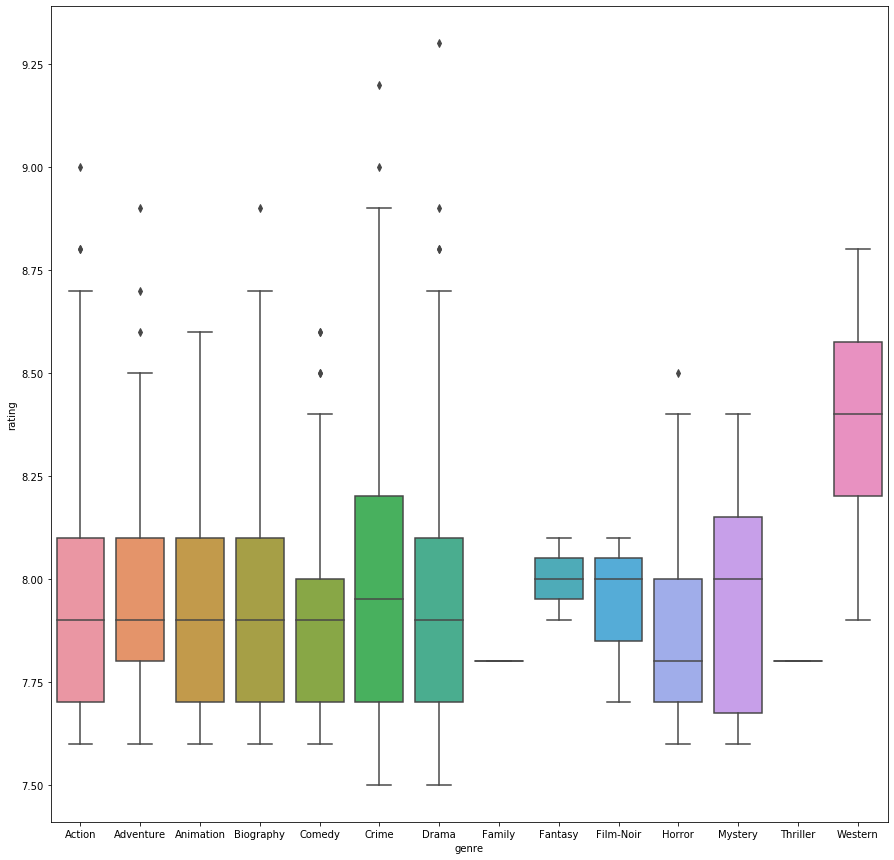

In [50]:
fig,ax = plt.subplots()
fig.set_size_inches(15,15)
bx = sns.boxplot(data=movies,x='genre',y='rating')

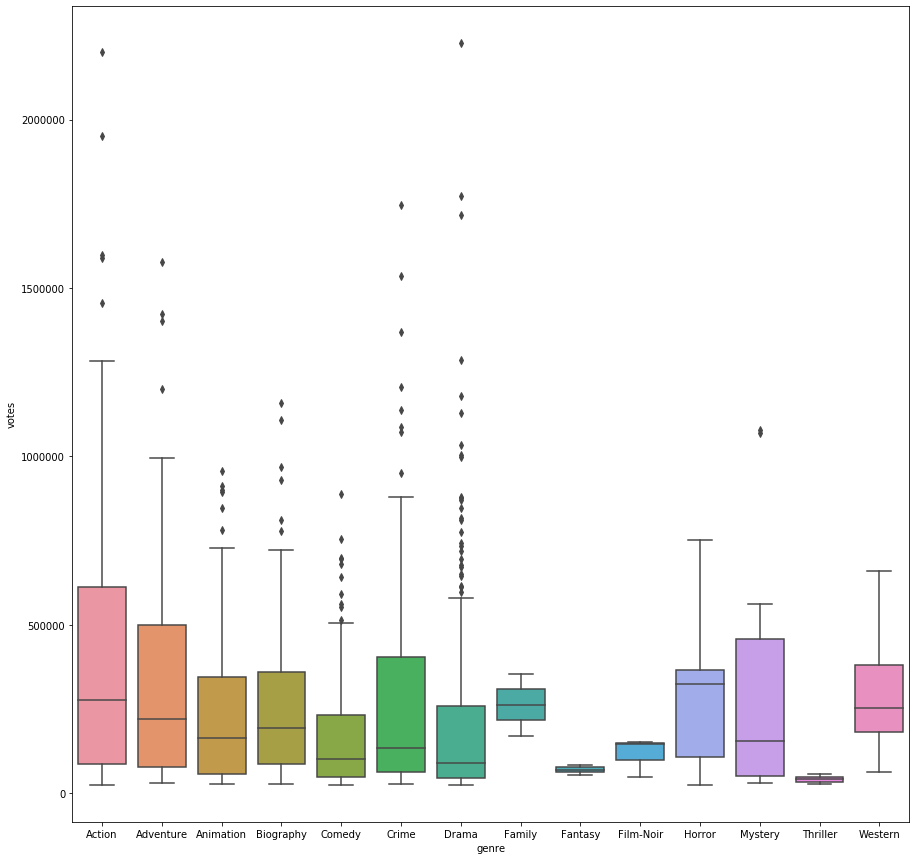

In [57]:
f, axes = plt.subplots()
f.set_size_inches(15,15)
sns.boxplot(data=movies,x='genre',y='votes')

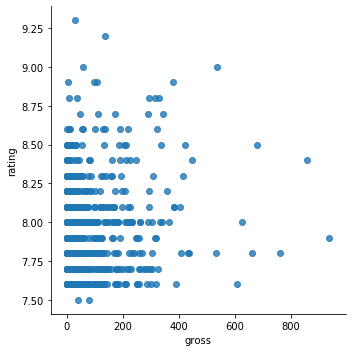

In [62]:
k1 = sns.lmplot(data=movies,x='gross',y='rating',fit_reg=False)

In [18]:
Gross =[]
myLabels =[]
for g in movies.genre.cat.categories:
    Gross.append(movies[movies.genre == g].gross)
    myLabels.append(g)
len(Gross)

14

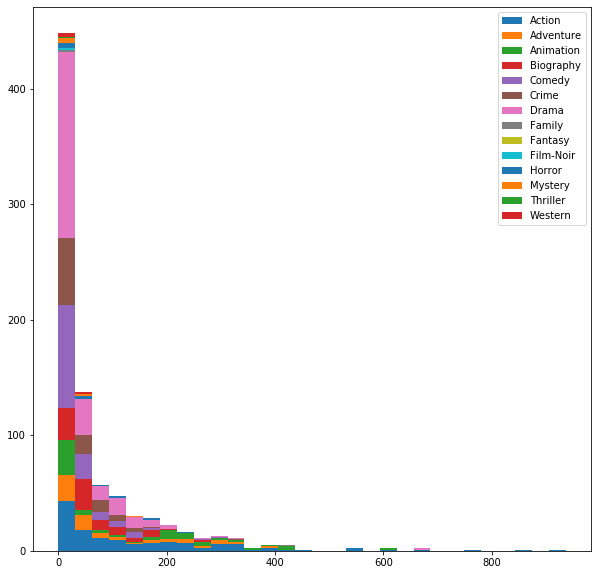

0.0

In [195]:
plt.hist(Gross,bins=30,stacked=True,rwidth=1,label =myLabels )
plt.legend()
plt.show()

In [63]:
Rating =[]
myLabels =[]
for g in movies.genre.cat.categories:
    Rating.append(movies[movies.genre == g].rating)
    myLabels.append(g)
len(Rating)

14

In [90]:
import warnings
warnings.filterwarnings('ignore')

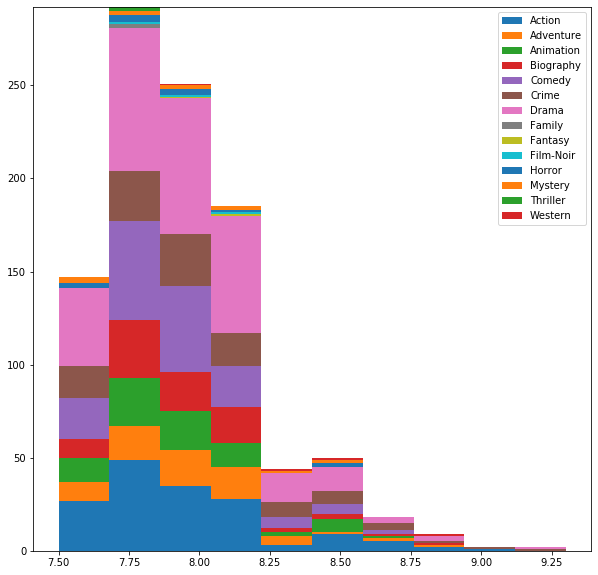

In [70]:
plt.hist(Rating,stacked=True,label = myLabels)
plt.legend()

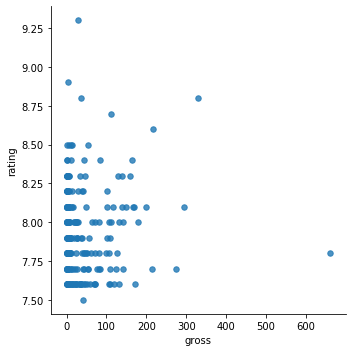

In [91]:
vis1 = sns.lmplot(data=movies[movies.genre == 'Drama'],x='gross',y='rating',fit_reg=False,size=5,aspect=1,\
                  scatter_kws={'s':30})
#gross vs votes for drama movies

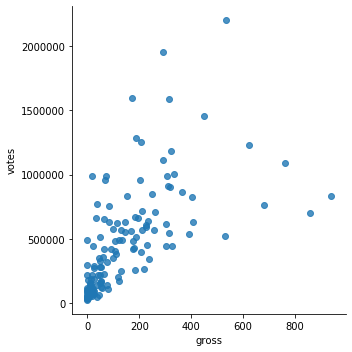

In [92]:
d1 = sns.lmplot(data=movies[movies.genre == 'Action'],x='gross',y='votes',fit_reg=False,size=5)

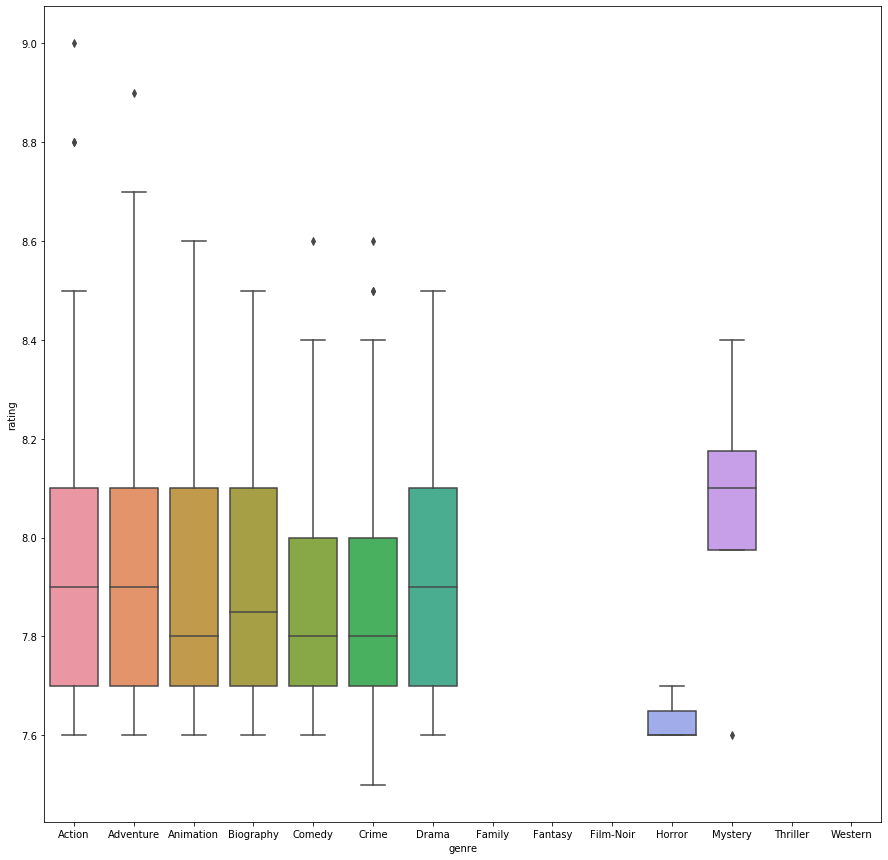

In [81]:
f, axes = plt.subplots()
f.set_size_inches(15,15)
pl = sns.boxplot(data=movies[(movies.year >=2000) & (movies.year<=2019)],x='genre',y='rating')

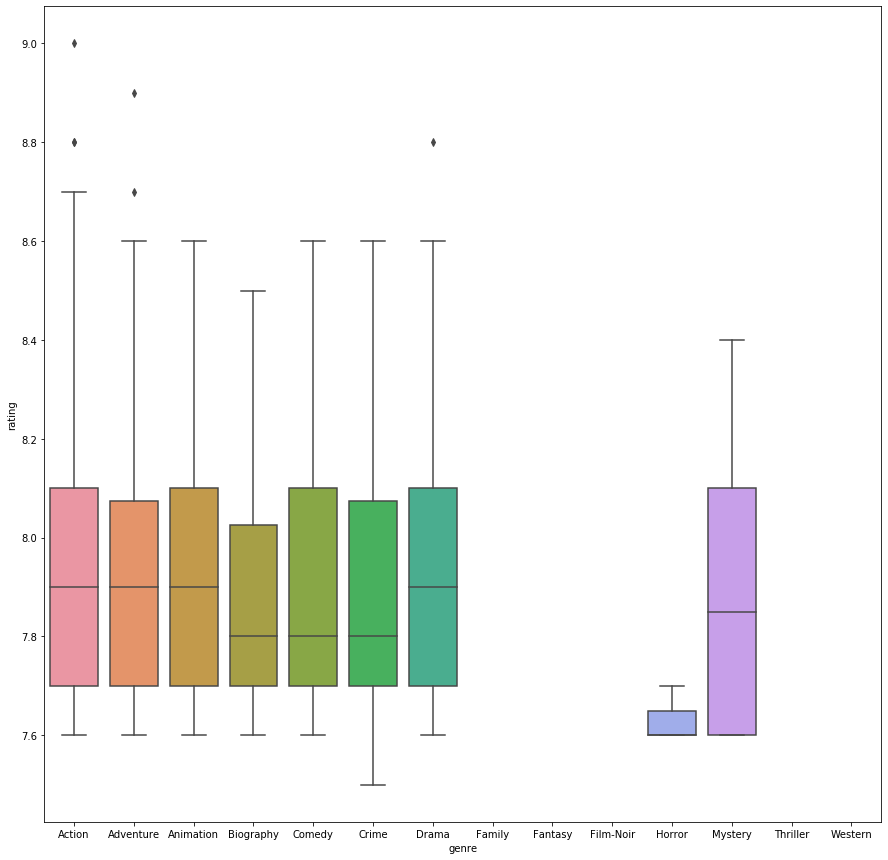

In [83]:
f, axes = plt.subplots()
f.set_size_inches(15,15)
pl = sns.boxplot(data=movies[movies.year>1995],x='genre',y='rating')

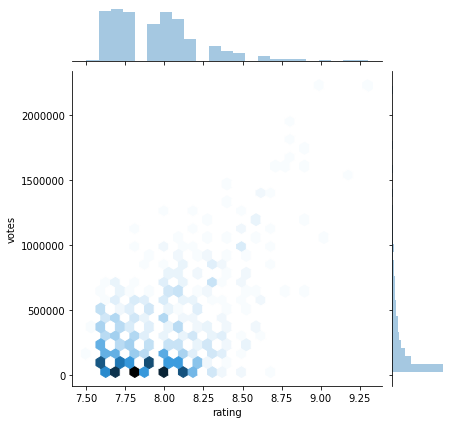

In [86]:
j = sns.jointplot(data=movies,x='rating',y='votes',kind='hex')

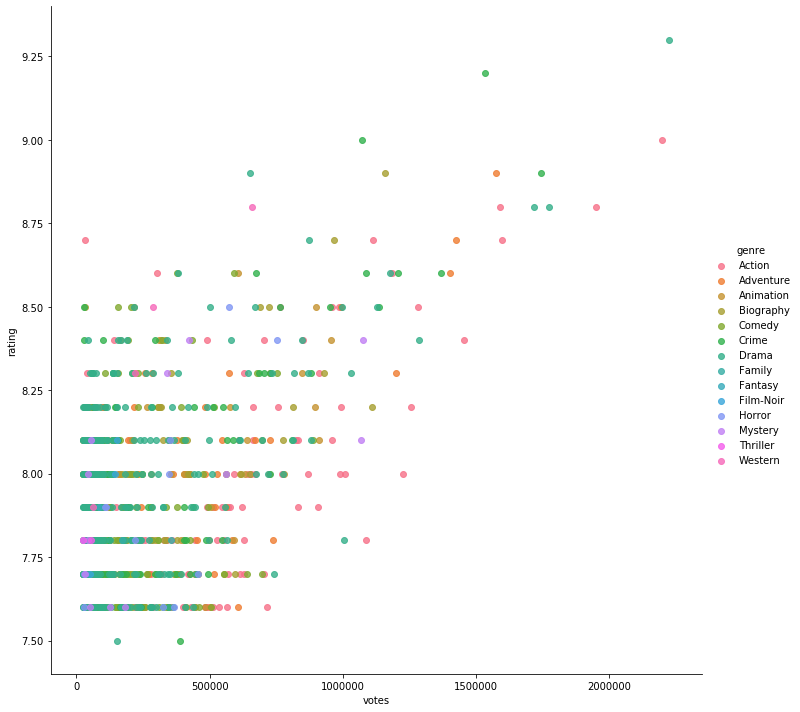

In [93]:
v = sns.lmplot(data=movies,x='votes',y='rating',fit_reg=False,hue='genre',size=10)

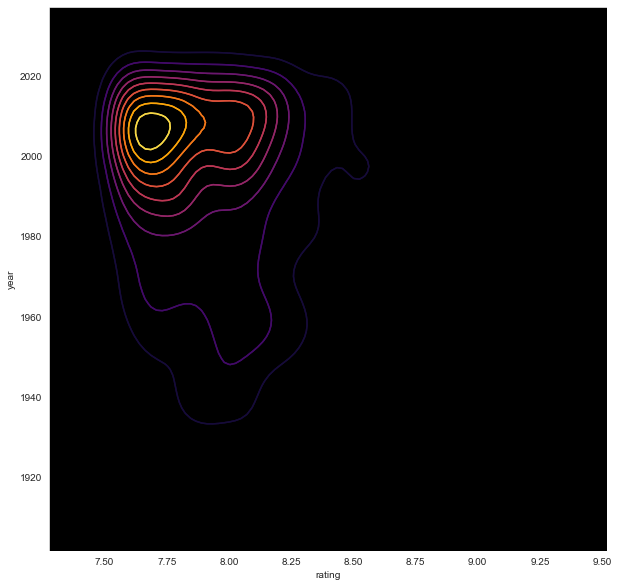

In [112]:
sns.set_style('dark',{'axes.facecolor':'black'})
kd = sns.kdeplot(movies.rating,movies.year,shade=False,shade_lowest=False\
                 ,cmap='inferno')
kd = sns.kdeplot(movies.rating,movies.year,cmap='inferno')


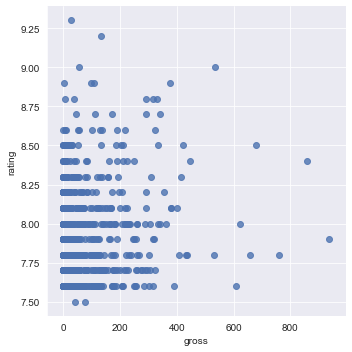

In [119]:
sns.set({'axes.facecolor':'white'})
sns.lmplot(data=movies,x='gross',y='rating',fit_reg=False)